<a href="https://colab.research.google.com/github/granados-pastrana/Machine-Learning-Industry-Aplications/blob/main/01_Customer_Segmentation_Marketing_Campaigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bank Customer Segmentation for Marketing Campaigns
- ML Methods used:
  - Unsupervised Methods: 
    - Clustering: k-means
    - Dimensionality Reduction: Principal Component Analysis
    - Segments detection: Autoencoders

- Statistical Analysis
  - Kernel Density Estimate
  - Correlation


### Marketing relevance
- Company's brand
- Engage costumers (undersanding their needs)
- Grow revenue (by reaching new customers)
- Icrease sales

Understanding needs, marketers can launch a target marketing campaign through segments performed by data scientist

### Business Case Statement
- The American Bannk wants to launch a targeted and marketing campaign by dividing their customers into at least 3 distinctive groups
- Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


### 1. LOAD DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path_data = 'Colab Notebooks/ML+/01_customer_segmentation_marketing/'
file_name = 'Marketing_data.csv'
creditcard_df = pd.read_csv('/content/drive/My Drive/' + path_data + file_name)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ============================================================================
# Dataset Variables
# ============================================================================
# - CUST_ID                             id of credit holder                     (Numeric)
# - BALANCE                             amount left in customer's account       (Numeric)
# - BALANCE_FREQUENCY                   How ferquently the balance is updated   (Boolean)(1=frequently, 0=Not_frequently)
# - PURCHASES                           Amount of purchases made                (Numeric)
# - ONEOFF_PURCHASES                    Maximum purchase_amt done in one-go     (Numeric)
# - INSTALLMENTS_PURCHASES              Purchasee done in installment           (Numeric)
# - CASH_ADVANCE                        Cash in advance given                   (Numeric)
# - PURCHASES_FREQUENCY                 How frequently the purchases are being made  (Boolean) (1=frequently)
# - ONEOFF_PURCHASES_FREQUENCY          How frequently purchases happening in one-go (Boolean) (1=frequently)
# - PURCHASES_INSTALLMENTS_FREQUENCY    Purchases in installments               (Boolean) (1=frequently)
# - CASH_ADVANCE_FREQUENCY              Frequency cash in advance               (Boolean) (1=frequently)
# - CASH_ADVANCE_TRX                    Number of trans. in advance             (Numeric)
# - PURCHASES_TRX                       Number of trans.                        (Numeric)
# - CREDIT_LIMIT                        Limit credit card                       (Numeric)
# - PAYMENTS                            Amount of payments done by user         (Numeric)
# - MINIMUM_PAYMENTS                    Minimum amount of payments              (Numeric)
# - PRC_FULL_PAYMENT                    Percent of full payment paid            (Numeric)
# - TENURE                              Tenure of credit card service           (Numeric)

creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# Variables Distribution Summary
# ============================================================================
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### 2. EXPLORE & PREPARE DATASET

In [ ]:
# Check if we have any missing data
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [ ]:
# Check if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [ ]:
# Let's drop Customer ID since it has no meaning here 
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [ ]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


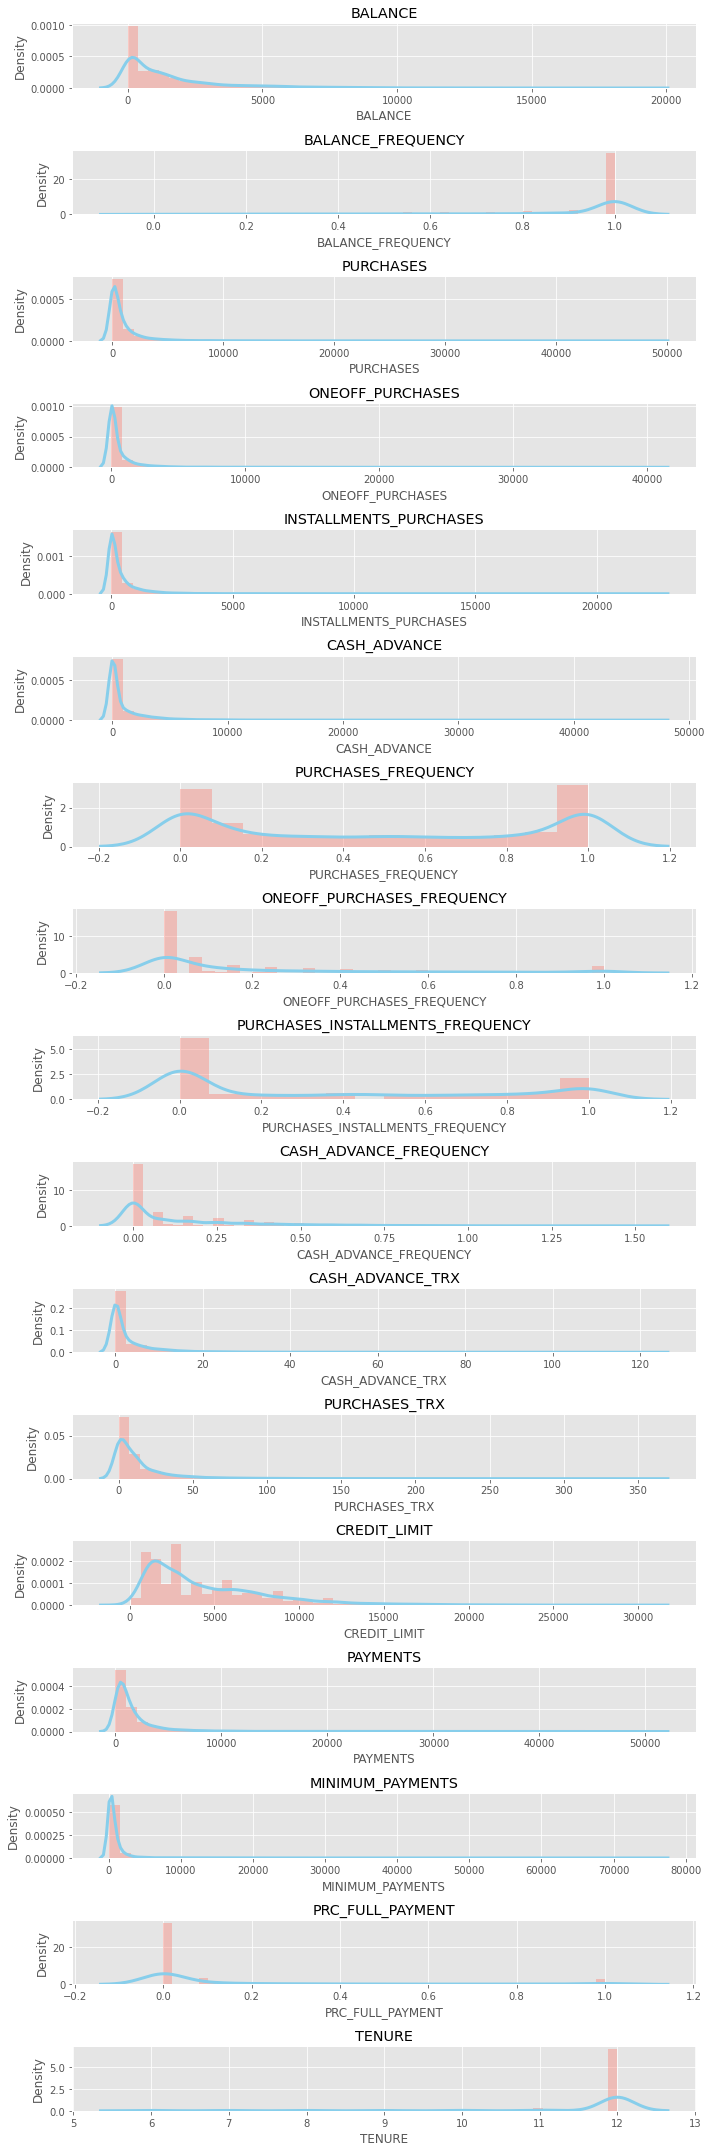

In [ ]:
# Kernel Density Estimate (KDE)
# ============================================================================
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure


plt.figure(figsize=(10,30))
n_cols = len(creditcard_df.columns)

for i in range(n_cols):
  plt.subplot(n_cols, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "skyblue", "lw": 3, "label": "KDE"}, hist_kws={"color": "salmon"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

In [ ]:
# # Visually check correlations & Trtends
# # ============================================================================
# sns.pairplot(creditcard_df);
# print("""
# - Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# - Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'
# """)


- 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
-  Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'
 


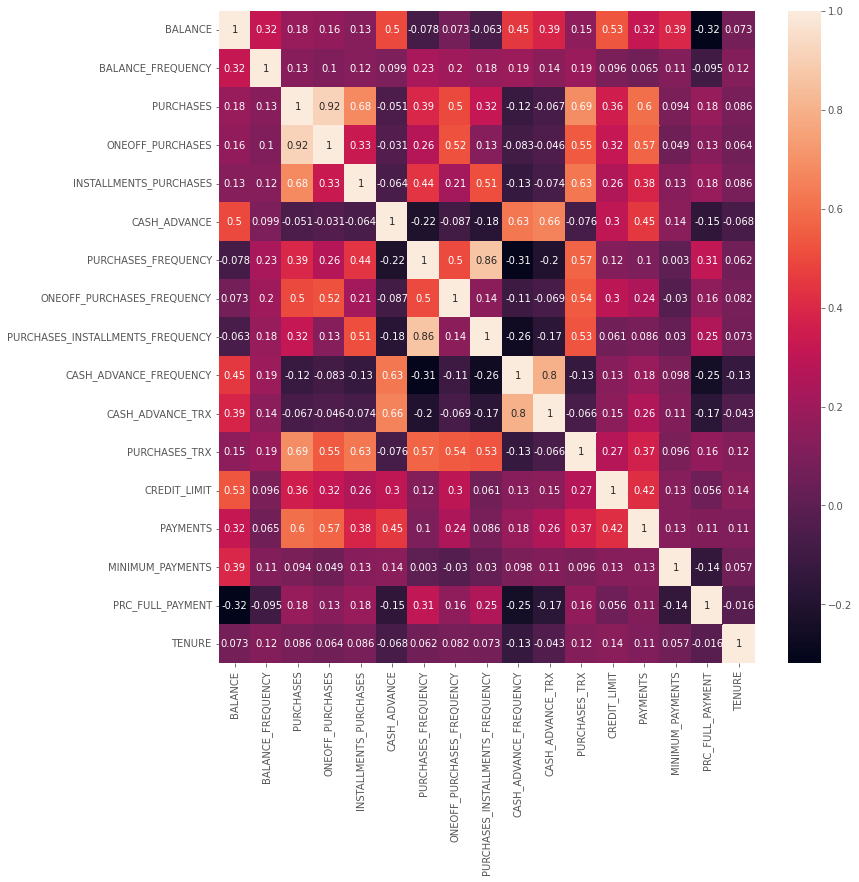

In [ ]:
# Correlation Matrix
# ============================================================================
correlations = creditcard_df.corr()

f, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(correlations, annot = True);
print("""
- 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
-  Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'
 """)

### 3. CLUSTERING


K-means
- It is the most commonly used clustering algorithm. It's a centroid-based algorithm and the simplest unsupervised learning algorithm.
- The algorithm groups observations with similar attribute values together by measuring the Euclidian distance between points
- This algorithm tries to minimize the variance of data points within a cluster.
- K-means is best used on smaller data sets because it iterates over all of the data points. 

K-means Algorithm procedure
1. Choose number of clusters "K"
2. Select random K points that are going to be centroids for each cluste
3. Assign each data point to the nearest centroid, creating "K" number of clusters
4. Calculate a new centroid for each cluste
5. Reassign each data point to the new closest centroid
6. Go to step four and iterate

Selecting the Optimal number of clusters using WCSS 

- Whithin Cluster Sum of Squares(WCSS): The sum of the squared deviations from each observation and the cluster centroid.
It is a measure of the variability of the observations within each cluster.
- Making a Trade-Off Curve #Clusters vs WCSS
- Slect the optimal number of clusters based on the "Elbow Method"

In [ ]:
# Scale the data first
# ============================================================================
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
creditcard_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


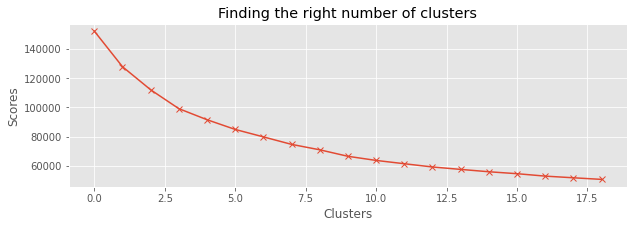

In [ ]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_) # Sum of squared distances of samples to their closest cluster center

plt.figure(figsize=(10,3))
plt.plot(scores_1, 'x-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7.

In [ ]:
# Apply K-means Method
# ============================================================================
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [ ]:
# Check "cluster_centers_" of each cluster
# ============================================================================
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers           

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.901817,0.466986,2.270963,1.756936,2.141920,-0.195512,1.158629,1.583889,1.226198,-0.312181,-0.212097,2.781452,1.238947,1.290295,0.441655,0.304778,0.334182
1,0.018333,0.403266,-0.361726,-0.246921,-0.401547,-0.087431,-0.866458,-0.410312,-0.757690,0.113230,-0.022632,-0.486512,-0.305764,-0.248306,-0.009511,-0.456448,0.272317
2,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
3,-0.701163,-2.144787,-0.311233,-0.235823,-0.302542,-0.319756,-0.557150,-0.445187,-0.440134,-0.520622,-0.376063,-0.419936,-0.175963,-0.192408,-0.256478,0.283762,0.199336
4,-0.164928,0.391845,0.453908,0.593981,-0.018141,-0.332523,0.943492,1.878868,0.088822,-0.406144,-0.322174,0.524320,0.373578,0.086654,-0.162522,0.406347,0.261047
5,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
6,1.699014,0.397210,-0.217256,-0.156145,-0.226900,2.021083,-0.474494,-0.212666,-0.411456,1.924399,1.943730,-0.265506,1.034719,0.812027,0.559683,-0.396456,0.069941
7,-0.364387,0.333522,-0.036963,-0.244149,0.360956,-0.363619,0.991355,-0.386657,1.206719,-0.475345,-0.361168,0.188172,-0.259145,-0.215973,-0.032490,0.314266,0.257586


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
# ============================================================================
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])

print("""
-> First Customers cluster (Transactors): 
    Those are customers who pay least amount of intrerest charges and careful with their money, 
    Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
-> Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): 
    highest balance ($5000) and cash advance (~$5000), 
    low purchase frequency, 
    high cash advance frequency (0.5), 
    high cash advance transactions (16) and low percentage of full payment (3%)
-> Third customer cluster (VIP/Prime): 
    high credit limit $16K and highest percentage of full payment, 
    target for increase credit limit and increase spending habits
-> Fourth customer cluster (low tenure): 
    these are customers with low tenure (7 years), low balance 
""")
cluster_centers


-> First Customers cluster (Transactors): 
    Those are customers who pay least amount of intrerest charges and careful with their money, 
    Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
-> Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): 
    highest balance ($5000) and cash advance (~$5000), 
    low purchase frequency, 
    high cash advance frequency (0.5), 
    high cash advance transactions (16) and low percentage of full payment (3%)
-> Third customer cluster (VIP/Prime): 
    high credit limit $16K and highest percentage of full payment, 
    target for increase credit limit and increase spending habits
-> Fourth customer cluster (low tenure): 
    these are customers with low tenure (7 years), low balance 



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3441.530986,0.987896,5855.151608,3508.591111,2347.978936,568.874079,0.955365,0.674962,0.851760,0.072674,1.801418,83.846336,9002.245863,5468.421612,1893.464949,0.242857,11.964539
1,1602.633513,0.972801,230.371307,182.599218,47.953830,795.524463,0.142599,0.080054,0.063312,0.157803,3.094381,2.616967,3381.956176,1014.321251,842.041935,0.020211,11.881748
2,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
3,105.063837,0.369191,338.250830,201.019898,137.482244,308.328143,0.266740,0.069650,0.189517,0.030962,0.682472,4.271804,3854.224762,1176.141747,266.495312,0.236710,11.784081
4,1221.190567,0.970095,1972.987205,1578.324155,394.663050,281.554284,0.869019,0.762960,0.399738,0.053871,1.050228,27.742466,5853.677875,1983.997322,485.454980,0.272564,11.866667
5,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
6,5100.828211,0.971366,539.034797,333.268037,205.884843,5217.176211,0.299913,0.139015,0.200914,0.520236,16.513357,8.110337,8259.180657,4083.881451,2168.523316,0.037758,11.610918
7,806.034585,0.956279,924.232605,187.200476,737.475444,216.344258,0.888229,0.087111,0.844018,0.040023,0.784119,19.387097,3551.573301,1107.923060,788.489699,0.245632,11.862035


In [ ]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster#.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,2


In [ ]:
# # Plot the histogram of differnt clusters
# for i in creditcard_df.columns:
#   plt.figure(figsize = (35, 5))
#   for j in range(8):
#     plt.subplot(1,8,j+1)
#     cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
#     cluster[i].hist(bins = 20)
#     plt.title('{}    \nCluster {} '.format(i,j))
  
#   plt.show()

### 4. DIMENSIONALITY REDUCTION
    4.1. APPLY PRINCIPAL COMPONENT ANALYSIS (PCA)

PCA
- It is an unsupervised ML algorithm
- it performs dimensionality reduction, while attemting at keeping the original information unchanged.
- Try to find a new set of features called components
- Components are composites of the uncorrelated given input features

In [ ]:
# Obtain the principal components 
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(creditcard_df_scaled)

# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2', 'pca3'])
pca_df.head()

,pca1,pca2,pca3
0,-1.682221,-1.076451,0.488552
1,-1.138297,2.506468,0.601775
2,0.969684,-0.383520,0.102374
3,-0.873629,0.043162,1.460419
4,-1.599434,-0.688579,0.365022


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,pca3,cluster
0,-1.682221,-1.076451,0.488552,1
1,-1.138297,2.506468,0.601775,6
2,0.969684,-0.383520,0.102374,4
3,-0.873629,0.043162,1.460419,1
4,-1.599434,-0.688579,0.365022,1


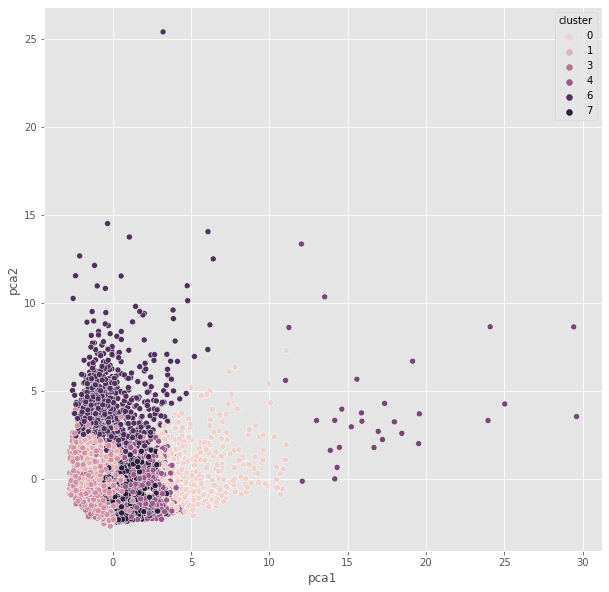

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df)
plt.show()

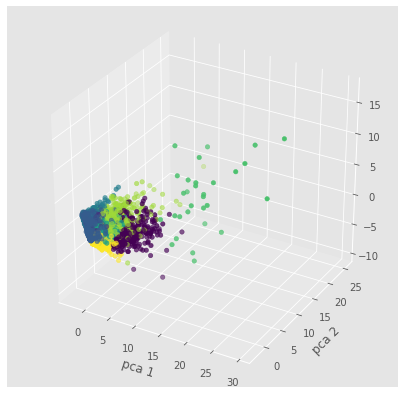

In [ ]:
plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')

ax.scatter3D(pca_df['pca1'], pca_df['pca2'], pca_df['pca3'], c=pca_df['cluster'], cmap='viridis');
plt.xlabel('pca 1')
plt.ylabel('pca 2');

### 4. DIMENSIONALITY REDUCTION
    4.2. APPLY AUTOENCODERS

AUTOENCODERS
- Unsupervised method (training)
- Are a type of ANN that are used to perform task of data encoding (representation learning).
- The input is the same as the output
- The code is a compact “summary” or “compression” of the input, also called the latent-space representation.
- 3 components: encoder, code and decoder. 
    - The **encoder** compresses the input and produces the **code**, the **decoder** then reconstructs the input only using this code.
- There is a bottleneck in the network which forces the network to create a compressed (**encoded**) version of the input
- Autoencoders works well when correlation exists between input data     
- There are need 3 things: an encoding method, decoding method, and a loss function to compare the output with the target

Input: encoder - bottleneck (code layer) - decoder: Output
- o -  o
- o o o
- o -  o

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD

In [ ]:
encoding_dim = 7
input_df = Input(shape=(17,))

# Glorot normal initializer draws samples from a truncated normal distribution 
x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 [==============================] - 5s 57ms/step - loss: 0.6916
Epoch 2/25
70/70 [==============================] - 4s 57ms/step - loss: 0.4879
Epoch 3/25
70/70 [==============================] - 4s 57ms/step - loss: 0.4237
Epoch 4/25
70/70 [==============================] - 4s 58ms/step - loss: 0.4054
Epoch 5/25
70/70 [==============================] - 4s 58ms/step - loss: 0.3761
Epoch 6/25
70/70 [==============================] - 4s 57ms/step - loss: 0.3509
Epoch 7/25
70/70 [==============================] - 4s 57ms/step - loss: 0.3402
Epoch 8/25
70/70 [==============================] - 4s 58ms/step - loss: 0.3059
Epoch 9/25
70/70 [==============================] - 5s 72ms/step - loss: 0.3002
Epoch 10/25
70/70 [==============================] - 6s 79ms/step - loss: 0.2904
Epoch 11/25
70/70 [==============================] - 5s 68ms/step - loss: 0.2869
Epoch 12/25
70/70 [==============================] - 4s 58ms/step - loss: 0.2756
Epoch 13/25
70/70 [==================

In [ ]:
# Save Model
# autoencoder.save_weights('autoencoder.h5')

In [ ]:
pred = encoder.predict(creditcard_df_scaled)
pd.DataFrame(pred)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.606760,0.0,0.0,0.0,0.0,0.0,0.0,1.449672,0.0
1,0.0,2.679950,0.0,0.0,0.0,0.0,0.0,0.0,4.409211,0.0
2,0.0,2.367700,0.0,0.0,0.0,0.0,0.0,0.0,2.043365,0.0
3,0.0,0.603971,0.0,0.0,0.0,0.0,0.0,0.0,1.705900,0.0
4,0.0,0.781540,0.0,0.0,0.0,0.0,0.0,0.0,1.560778,0.0
...,...,...,...,...,...,...,...,...,...,...
8945,0.0,0.154238,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
8946,0.0,0.253449,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
8947,0.0,0.799773,0.0,0.0,0.0,0.0,0.0,0.0,6.703573,0.0
8948,0.0,1.076033,0.0,0.0,0.0,0.0,0.0,0.0,7.328777,0.0


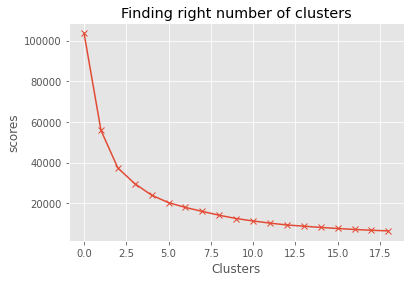

In [ ]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'x-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

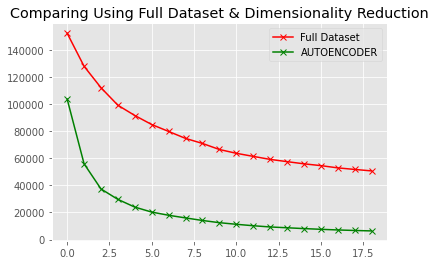

In [ ]:
plt.plot(scores_1, 'bx-', color = 'r', label='Full Dataset')
plt.plot(scores_2, 'bx-', color = 'g', label='AUTOENCODER')
plt.legend();
plt.title('Comparing Using Full Dataset & Dimensionality Reduction');

In [ ]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

In [ ]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [ ]:
pca = PCA(n_components=3)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2', 'pca3'])
pca_df.head()

,pca1,pca2,pca3
0,-1.553863,-0.215525,-1.594020e-07
1,2.042516,-0.566371,-2.177971e-08
2,0.042643,0.735650,-2.131429e-07
3,-1.361074,-0.384260,-1.364643e-07
4,-1.355766,-0.154995,-1.601002e-07


In [ ]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,pca3,cluster
0,-1.553863,-0.215525,-1.594020e-07,1
1,2.042516,-0.566371,-2.177971e-08,0
2,0.042643,0.735650,-2.131429e-07,1
3,-1.361074,-0.384260,-1.364643e-07,1
4,-1.355766,-0.154995,-1.601002e-07,1


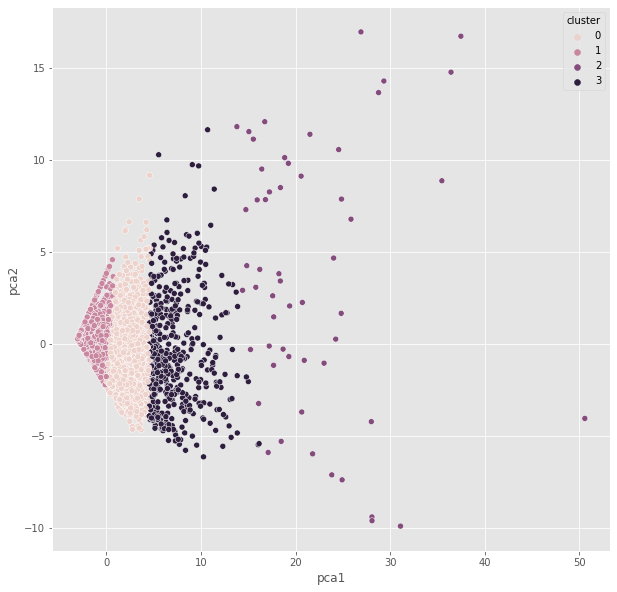

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df)
plt.show()

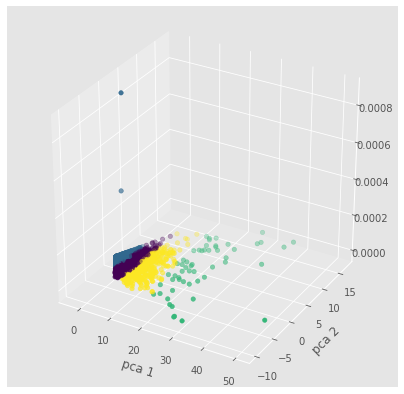

In [ ]:
plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')

ax.scatter3D(pca_df['pca1'], pca_df['pca2'], pca_df['pca3'], c=pca_df['cluster'], cmap='viridis');
plt.xlabel('pca 1')
plt.ylabel('pca 2');